In [1]:
import os
import numpy as np
np.random.seed(420)
from IPython.display import HTML

from HMM import unsupervised_HMM, from_hmm
from HMM_helper import (
    parse_seqs,
    parse_text,
    update_syll_map,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen
)

In [2]:
with open(os.path.join(os.getcwd(), 'data/shakespeare.txt'), 'r') as f:
    text = f.read()

with open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt'), 'r') as f:
    syll_map0 = {}
    for i, line in enumerate(f):
        line = line.strip().split()
        word = line[0] 
        # Add 10 to denote end of line syll_count
        sylls = np.array([int(s.replace('E', '1')) for s in line[1:]])
        assert(word not in syll_map0)
        syll_map0[word] = sylls

In [3]:
seqs = parse_text(text, by='line')
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=True, with_words=False)

In [5]:
hmm8 = unsupervised_HMM(obs, 10, 5)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.52s/it]


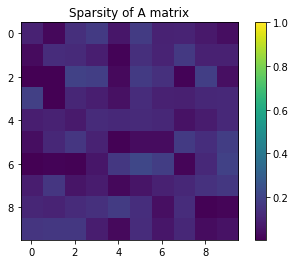

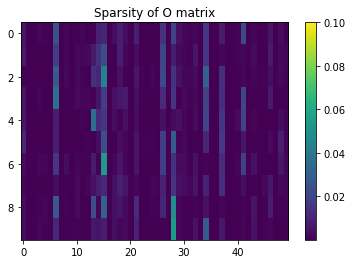

In [6]:
visualize_sparsities(hmm8, O_max_cols=50)

In [7]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
Who his away the note the and but despite pace when prime me the then do your earth time if if i bide one present...


In [9]:
shmm = from_hmm(hmm8, syll_map, obs_map)
print(shmm.generate_sonnet())

Precious but thy it a in heart fair child,
With of of you less dreaming am bad but,
Life give to alone nothing some in not,
Fall the forbidden shame boy of wrong tell,
Wrinkles air like the thee blessed rage mine,
Saucy we lie of the to blest you tied,
See you it beauty and still time him and,
Review amiss influence air the you of,
Wrinkles did not find subject old with make,
That home for nor art and so his thy set,
Ever-fixed though night everywhere me,
Dear in die fell love hides good i to who,
Erst by lets is but friend those three been was,
Scorn to unbred spirits this renew west,


In [15]:
rhyme_dict_gen(text, connected=False, with_words=True)

{'increase': array(['decease', 'cease', 'decrease'], dtype='<U8'),
 'decease': array(['increase', 'lease'], dtype='<U8'),
 'die': array(['thereby', 'memory', 'eye', 'lie', 'dignity'], dtype='<U7'),
 'memory': array(['die', 'sky', 'fortify', 'masonry', 'eternity'], dtype='<U8'),
 'eyes': array(['lies', 'cries', 'arise', 'devise', 'prophecies', 'spies',
        'despise'], dtype='<U10'),
 'lies': array(['eyes', 'subtleties'], dtype='<U10'),
 'fuel': array(['cruel'], dtype='<U5'),
 'cruel': array(['fuel', 'jewel'], dtype='<U5'),
 'ornament': array(['content'], dtype='<U7'),
 'content': array(['ornament', 'spent'], dtype='<U8'),
 'spring': array(['niggarding', 'sing', 'thing', 'king'], dtype='<U10'),
 'niggarding': array(['spring'], dtype='<U6'),
 'brow': array(['now', 'allow', 'mow'], dtype='<U5'),
 'now': array(['brow', 'how', 'bow', 'bough'], dtype='<U5'),
 'field': array(['held'], dtype='<U4'),
 'held': array(['field', 'stelled'], dtype='<U7'),
 'days': array(['praise', 'decays', 'lays